In [1]:
# Rori Cooper - Homework Unit 5 Matplotlib (Pyber)

%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data (set dataframes)
city_data = pd.read_csv(city_data_to_load)
#> print(city_data)
ride_data=pd.read_csv(ride_data_to_load)
#> print(ride_data)

# Combine the data into a single dataset
data_merged= pd.merge(ride_data,city_data, how="left",on=["city"])

# Display the data table for preview
data_merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

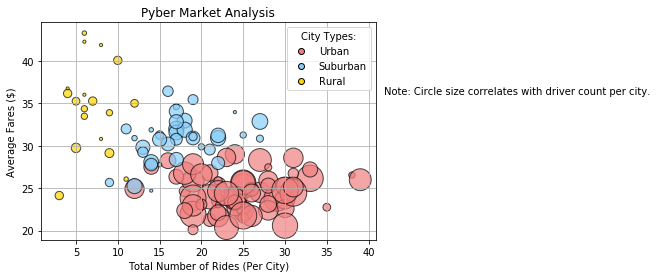

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = data_merged[data_merged["type"] == "Urban"]
rural_cities = data_merged[data_merged["type"]=="Rural"]
suburban_cities = data_merged[data_merged["type"]=="Suburban"]
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count =  urban_cities.groupby(["city"]).mean()["driver_count"] 
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count =  rural_cities.groupby(["city"]).mean()["driver_count"] 
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count =  suburban_cities.groupby(["city"]).mean()["driver_count"] 

#urban_cities.head()
#rural_cities.head()
#suburban_cities.head()
ride_sharing_data = pd.DataFrame({"Number of Urban Rides"        :urban_ride_count,
                                  "Number of Urban Rides"        :rural_ride_count,
                                  "Number of Suburban Rides"     :suburban_ride_count,
                                  "Urban Average Fare"           :urban_avg_fare,
                                  "Rural Average Fare"           :rural_avg_fare,
                                  "Suburban Average Fare"        :suburban_avg_fare,
                                  "Number of Urban Drivers"      :urban_driver_count,
                                  "Number of Rural Drivers"      :rural_driver_count,
                                  "Number of Suburban Drivers"   :suburban_driver_count})
ride_sharing_data.head()

# Build the scatter plots for each city types
plt.scatter(x=urban_ride_count, y=urban_avg_fare, s = 10 * urban_driver_count, marker="o", color="lightcoral", edgecolor = "black",
           alpha = 0.7, label='Urban')
plt.scatter(x=rural_ride_count, y=rural_avg_fare, s = 10 * rural_driver_count, marker="o", color="gold", edgecolor = "black",
           alpha = 0.7, label='Rural')
plt.scatter(x=suburban_ride_count, y=suburban_avg_fare, s = 10 * suburban_driver_count, marker="o", color="lightskyblue",
            edgecolor = "black", alpha = 0.7, label='Suburban')

#plt.show()
# Incorporate the other graph properties
plt.title('Pyber Market Analysis')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

# Create a legend
legendColors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='',markeredgecolor="black") for color in legendColors.values()]
plt.legend(markers, legendColors.keys(), numpoints=1, title='City Types:', loc='best')

# Incorporate a text label regarding circle size
plt.figtext(.92, 0.63, 'Note: Circle size correlates with driver count per city.')
plt.grid()


# Save Figure
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig("Pyber_Market_Analysis.png",dpi=100)


## Total Fares by City Type

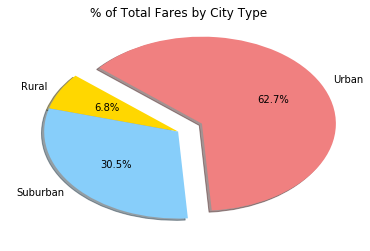

In [3]:
# Calculate Type Percents
city_type_total_fares = data_merged.groupby(["city","type"])
#city_type_total_fares.head()
fare_by_type = pd.DataFrame(data_merged.groupby(["type"]).sum()["fare"])
fare_by_type.columns = ["total_fares"]
#fare_by_type
fare_count = fare_by_type["total_fares"].sum()
#fare_count
rural_fares = round(fare_by_type["total_fares"].loc["Rural"],2)
#rural_fares
suburban_fares = round(fare_by_type["total_fares"].loc["Suburban"],2)
#suburban_fares
urban_fares = round(fare_by_type["total_fares"].loc["Urban"],2)
#urban_fares

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_fares, suburban_fares, urban_fares]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Rural': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Urban': color_scheme['Light Coral']}
colors = [city_color[n] for n in labels]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
#plt.show()

# Save Figure
fig2 = plt.gcf()
plt.draw()
plt.show()
fig2.savefig("Percent_of_Total_Fares_by_City_Type.png",dpi=100)


## Total Rides by City Type

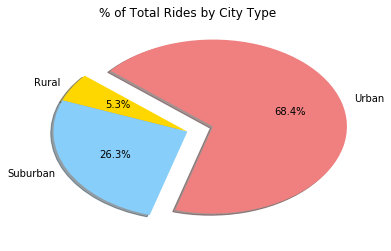

In [4]:
# Calculate Ride Percents
city_type_total_rides = pd.DataFrame(data_merged.groupby(["city","type"]).sum())
city_type_total_rides = pd.DataFrame(data_merged.groupby(["type"]).count()["ride_id"])
city_type_total_rides.columns = ["total_rides"]
#city_type_total_rides
rides_count = city_type_total_rides["total_rides"].sum()
#rides_count
rural_rides = city_type_total_rides["total_rides"].loc["Rural"]
#rural_rides
suburban_rides = city_type_total_rides["total_rides"].loc["Suburban"]
#suburban_rides
urban_rides = city_type_total_rides["total_rides"].loc["Urban"]
#urban_rides

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_rides, suburban_rides, urban_rides]
colors = [city_color[n] for n in labels]
explode = (0, 0, 0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Save Figure
fig3 = plt.gcf()
plt.draw()
plt.show()
fig3.savefig("Percent_of_Total_Rides_by_City_Type.png",dpi=100)

## Total Drivers by City Type

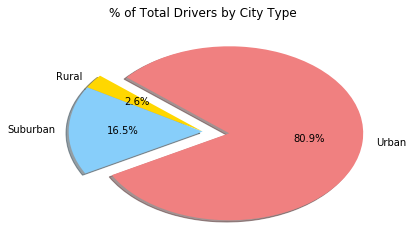

In [8]:
# Calculate Driver Percents (could not get dups removed so had to take different approach with this last step)
driver_group = city_data.groupby('type').sum()['driver_count']
driver_group

#Build Pie Chart
labels = driver_group.index
colors = [city_color[n] for n in labels]
explode = (0, 0, 0.2)
plt.pie(driver_group, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
#plt.show()


# Save Figure
fig4= plt.gcf()
plt.draw()
plt.show()
fig4.savefig("Percent_of_Total_Drivers_by_City_Type.png",dpi=100)

In [6]:
#city_type_total_fares = data_merged.groupby(["city","type"])
#city_type_total_fares.head()
#data_merged.to_excel("test.xls")